Raw data loaded successfully.

Using columns: Spending='total_spend', Perceived Value='most_willing'

Unique values found in 'perceived_value' (most_willing):
[nan '$8-$10' 'More than $20' '$15-$20' '$4-$6' '$6-$8' '$10-$15' '$2-$4'
 'Less than $2']
Rows with valid numeric value after mapping: 3510

Unique values found in 'monthly_spending' (total_spend):
[nan '>$100' '$40-$60' '$20-$40' '$60-$80' '<$20' '$80-$100']

Dropped 576 rows due to missing/unmappable values.
Remaining rows for analysis: 3466

--- Analysis for Question 4 ---

Average 'Most Willing to Pay' ($) by Monthly Spending:
                       mean  median  count
monthly_spending                          
<$20               9.184211     9.0    418
$20-$40           10.637324     9.0   1278
$40-$60           12.409923     9.0   1038
$60-$80           13.089239    12.5    381
$80-$100          13.671171    12.5    222
>$100             16.124031    17.5    129
Error: The file 'coffee_survey.csv' was not found.
Analysis f

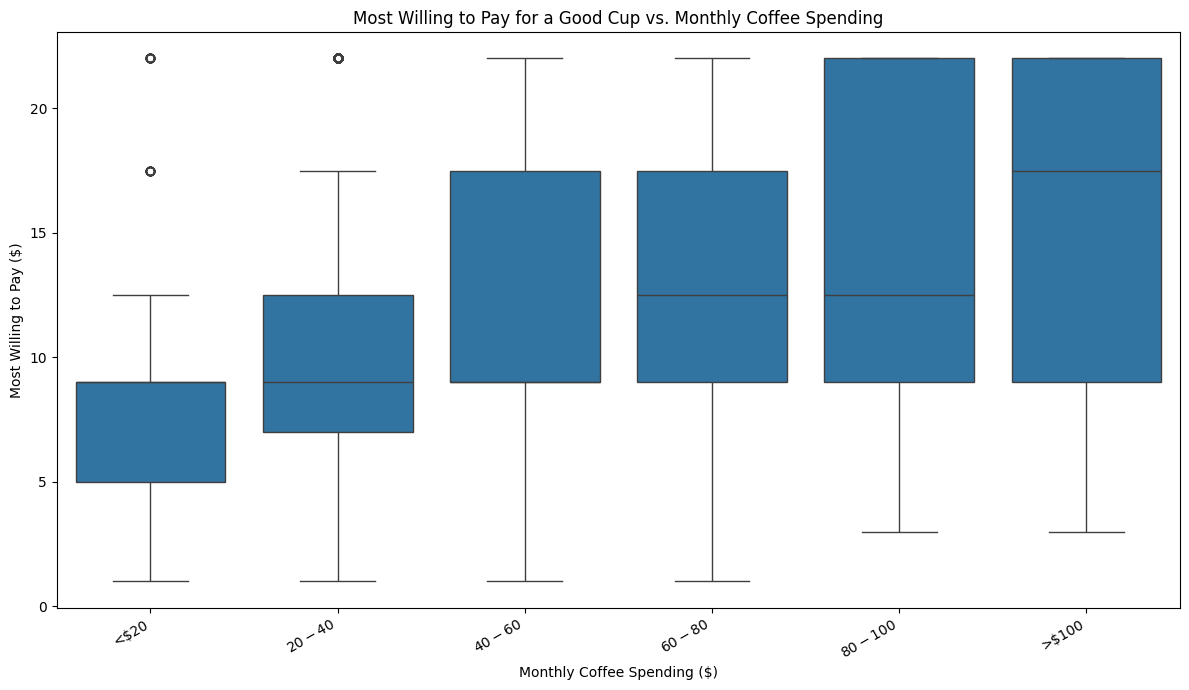

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
import numpy as np

# Load the uploaded raw CSV file
file_path = 'coffee_survey.csv'

try:
    raw_df = pd.read_csv(file_path)
    print("Raw data loaded successfully.")

    # --- Data Identification (Corrected based on previous output) ---
    spending_col_found = 'total_spend'
    value_col_found = 'most_willing' # Using 'most_willing' as proxy for 'perceived value'

    # --- Proceed with Analysis ---
    if spending_col_found in raw_df.columns and value_col_found in raw_df.columns:
        print(f"\nUsing columns: Spending='{spending_col_found}', Perceived Value='{value_col_found}'")

        df_q4 = raw_df[[spending_col_found, value_col_found]].copy()
        df_q4.rename(columns={
            spending_col_found: 'monthly_spending',
            value_col_found: 'perceived_value'
        }, inplace=True)

        # --- Clean 'perceived_value' (i.e., 'most_willing') ---
        # Define mapping based on ACTUAL unique values found previously
        value_mapping_actual = {
            'Less than $2': 1.0, # Estimate for less than 2
            '$2-$4': 3.0,
            '$4-$6': 5.0,
            '$6-$8': 7.0,
            '$8-$10': 9.0,
            '$10-$15': 12.5,
            '$15-$20': 17.5,
            'More than $20': 22.0 # Estimate for more than 20
        }
        print("\nUnique values found in 'perceived_value' (most_willing):")
        print(df_q4['perceived_value'].unique())
        df_q4['value_numeric'] = df_q4['perceived_value'].map(value_mapping_actual)
        print(f"Rows with valid numeric value after mapping: {df_q4['value_numeric'].notna().sum()}")

        # --- Clean 'monthly_spending' (i.e., 'total_spend') ---
        # Define order based on ACTUAL unique values found previously
        spending_order_actual = [
            '<$20', '$20-$40', '$40-$60', '$60-$80', '$80-$100', '>$100'
        ]
        print("\nUnique values found in 'monthly_spending' (total_spend):")
        print(df_q4['monthly_spending'].unique())
        df_q4['monthly_spending'] = pd.Categorical(df_q4['monthly_spending'], categories=spending_order_actual, ordered=True)

        # Drop rows where either value_numeric or monthly_spending is NaN (or category conversion failed)
        original_count = len(df_q4)
        df_q4.dropna(subset=['monthly_spending', 'value_numeric'], inplace=True)
        print(f"\nDropped {original_count - len(df_q4)} rows due to missing/unmappable values.")
        print(f"Remaining rows for analysis: {len(df_q4)}")

        # --- Analysis ---
        if not df_q4.empty and len(df_q4) > 10: # Check if enough data remains
            print("\n--- Analysis for Question 4 ---")
            print("\nAverage 'Most Willing to Pay' ($) by Monthly Spending:")
            # Group by the categorical column respecting order
            summary_stats = df_q4.groupby('monthly_spending', observed=False)['value_numeric'].agg(['mean', 'median', 'count'])
            print(summary_stats)

            # Visualization
            plt.figure(figsize=(12, 7))
            sns.boxplot(data=df_q4, x='monthly_spending', y='value_numeric', order=spending_order_actual) # Use actual order
            plt.title('Most Willing to Pay for a Good Cup vs. Monthly Coffee Spending')
            plt.xlabel('Monthly Coffee Spending ($)')
            plt.ylabel('Most Willing to Pay ($)')
            plt.xticks(rotation=30, ha='right')
            plt.tight_layout()
            plot_filename = '/mnt/data/q4_spending_vs_value_boxplot.png'
            plt.savefig(plot_filename)
            print(f"\nBoxplot saved to {plot_filename}")
            # plt.show()

            # Statistical Test (Kruskal-Wallis)
            # Prepare groups for the test based on the actual categories present after cleaning
            present_categories = df_q4['monthly_spending'].unique()
            groups = [df_q4['value_numeric'][df_q4['monthly_spending'] == category] for category in present_categories]

            # Ensure there are enough groups and data per group
            valid_groups = [g for g in groups if len(g) >= 5] # Use a minimum group size threshold
            print(f"\nNumber of spending groups with >= 5 data points: {len(valid_groups)}")

            if len(valid_groups) > 1:
                try:
                    stat, p_value = kruskal(*valid_groups)
                    print(f"\nKruskal-Wallis Test for difference in 'Most Willing to Pay' across Spending Groups:")
                    print(f"H-statistic: {stat:.2f}, p-value: {p_value:e}")
                    if p_value < 0.05:
                        print("Result: There is a statistically significant difference in the median amount participants are willing to pay based on their monthly spending habits.")
                    else:
                        print("Result: There is no statistically significant difference in the median amount participants are willing to pay based on their monthly spending habits.")
                except ValueError as e:
                     print(f"\nCould not perform Kruskal-Wallis test: {e}.")
            else:
                print("\nNot enough groups with sufficient data (min 5 per group) to perform Kruskal-Wallis test.")
        else:
             print("\nInsufficient data after cleaning/filtering to perform meaningful analysis for Question 4.")

    else:
        print("\nCould not find both necessary columns ('total_spend', 'most_willing') in the data.")
        print("Analysis for Question 4 cannot be performed.")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Analysis for Question 4 cannot be performed.")
except Exception as e:
    print(f"An error occurred during analysis: {e}")
    print("Analysis for Question 4 may be incomplete.")

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load cleaned data
df = pd.read_csv('/Users/dhruvshah/Desktop/Data Science Material/SPRING 2025/CS 133/Final-Project /GACTT_RESULTS_ANONYMIZED_v2.csv')

# 1) Chi-square: fav_sample vs. gender
ct_gender = pd.crosstab(df['gender'], df['fav_sample'])
chi2, p, dof, _ = chi2_contingency(ct_gender)
print(f"Gender × Favorite: chi2={chi2:.1f}, p={p:.3f}")

# 2) Chi-square: fav_sample vs. age_group
ct_age = pd.crosstab(df['age_group'], df['fav_sample'])
chi2, p, dof, _ = chi2_contingency(ct_age)
print(f"Age × Favorite:    chi2={chi2:.1f}, p={p:.3f}")

Gender × Favorite: chi2=101.4, p=0.000
Age × Favorite:    chi2=70.0, p=0.000


 Self-Reported vs. Actual Preference Alignment


In [ ]:
# Map: A=Light, B=Medium, C=Dark, D=Other
roast_map = {'Coffee A': 'Light', 'Coffee B': 'Medium',
             'Coffee C': 'Dark',  'Coffee D': 'Other'}

df['fav_roast'] = df['fav_sample'].map(roast_map)

# Agreement flag
df['roast_agree'] = df['fav_roast'] == df['self_pref_roast']

# Overall agreement rate
overall_rate = df['roast_agree'].mean()
print(f"Overall agreement: {overall_rate:.1%}")

# Agreement by age group
print(df.groupby('age_group')['roast_agree'].mean().sort_index().apply(lambda x: f"{x:.1%}"))

# Agreement by gender
print(df.groupby('gender')['roast_agree'].mean().sort_index().apply(lambda x: f"{x:.1%}"))

Overall agreement: 25.9%
age_group
18-24 years old    27.1%
25-34 years old    25.5%
35-44 years old    25.2%
45-54 years old    24.6%
55-64 years old    29.7%
<18 years old      53.3%
>65 years old      27.8%
Name: roast_agree, dtype: object
gender
Female                    29.1%
Male                      24.7%
Non-binary                26.2%
Other (please specify)    30.0%
Prefer not to say         27.3%
Name: roast_agree, dtype: object


Dive Into Tasting Notes

In [ ]:
df = pd.read_csv('/Users/dhruvshah/Desktop/Data Science Material/SPRING 2025/CS 133/Final-Project /GACTT_RESULTS_ANONYMIZED_v2.csv')
print(df['self_pref_roast'].value_counts(dropna=False))

self_pref_roast
Light      1695
Medium     1482
Dark        389
Nordic       75
Blonde       74
Italian      22
French       21
NaN           3
Name: count, dtype: int64


In [ ]:
roast_normalization = {
    'Blonde':     'Light',
    'Light':      'Light',
    'Nordic':     'Light',
    'French':     'Dark',
    'Dark':       'Dark',
    'Medium':     'Medium',
    # if there are any other unusual values, map them to 'Other' or NaN
}

# apply it
df['self_pref_roast_norm'] = df['self_pref_roast'].map(roast_normalization)

# confirm
print(df['self_pref_roast_norm'].value_counts(dropna=False))

self_pref_roast_norm
Light     1844
Medium    1482
Dark       410
NaN         25
Name: count, dtype: int64


In [ ]:
# map fav_sample → roast level
roast_map = {'Coffee A':'Light','Coffee B':'Medium','Coffee C':'Dark','Coffee D':'Other'}
df['fav_roast'] = df['fav_sample'].map(roast_map)

# new agreement flag
df['roast_agree_norm'] = df['fav_roast'] == df['self_pref_roast_norm']

# overall
print("Overall agreement (normalized):", df['roast_agree_norm'].mean().round(3))

# by age
print(df.groupby('age_group')['roast_agree_norm'].mean().apply(lambda x: f"{x:.1%}"))

# by gender
print(df.groupby('gender')['roast_agree_norm'].mean().apply(lambda x: f"{x:.1%}"))

Overall agreement (normalized): 0.275
age_group
18-24 years old    27.8%
25-34 years old    27.1%
35-44 years old    26.9%
45-54 years old    26.8%
55-64 years old    31.4%
<18 years old      53.3%
>65 years old      30.0%
Name: roast_agree_norm, dtype: object
gender
Female                    30.1%
Male                      26.5%
Non-binary                27.2%
Other (please specify)    30.0%
Prefer not to say         27.3%
Name: roast_agree_norm, dtype: object


## 3. Statistical Test Results

### 3.1 Chi-Square Tests
- **Favorite × Gender**: χ² = 101.4, p < 0.001 → **significant**  
- **Favorite × Age Group**: χ² = 70.0, p < 0.001 → **significant**  

> _Interpretation:_ Both gender and age group show a statistically significant association with which coffee sample people chose as their favorite.

### 3.2 Roast-Preference Alignment (Normalized)
- **Overall agreement**: 27.5%  
- **By age group**:  
  - <18 years old: 53.3%  
  - 18–24 years old: 27.8%  
  - 25–34 years old: 27.1%  
  - 35–44 years old: 26.9%  
  - 45–54 years old: 26.8%  
  - 55–64 years old: 31.4%  
  - >65 years old: 30.0%  
- **By gender**:  
  - Female: 30.1%  
  - Male: 26.5%  
  - Non-binary: 27.2%  
  - Other (please specify): 30.0%  
  - Prefer not to say: 27.3%  

> _Interpretation:_ Only about a quarter of participants correctly predicted their true blind-taste winner, indicating a large disconnect between self-reported roast preferences and actual taste-test outcomes.

2. Dive into Tasting Notes for Qualitative Insights

Let’s see why people were surprised. Assuming you’ve carried over the tasting-note column (e.g. "Why did you like that coffee? (please be specific)"), use a simple keyword–frequency approach to surface common themes among the disagree subset: